
<!-- Task Title -->

<div style="background-color: #708090; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">**Task 16: ML (Clustering Algorithm I)🔍🧩🤖**</h1>
</div>

These tasks cover key aspects of clustering algorithms, including implementation, evaluation, and comparison, providing hands-on experience with K-Means and hierarchical clustering techniques.


**Deadline: 31 July 2024**

.___ __ __ __ __ __ __ __ __

***@Bytewiseltd***
_______________________________________________________________________________________________________________________________

__________________________________________


<!-- <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span> -->

<div style="text-align: right;">
    <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span>
</div>

_________________________________________

# **Tasks 🔍📊**

##   **Dataset** :**Iris Dataset 🌸**


## 1. **Implementing K-Means Clustering**

**Task:**  
Apply K-Means clustering to the Iris dataset and visualize the clusters using a scatter plot of two features. Evaluate the clustering by comparing it to the actual species labels.

---

## 2. **Choosing the Optimal Number of Clusters** 📈

**Task:**
Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset. Visualize the Silhouette Score for different cluster counts.

---

## 3. **Cluster Visualization with PCA** 🎨


**Task:**  
Apply Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions. Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.

---

## 4. **Hierarchical Clustering: Dendrogram** 🌲

**Task:**  
Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.

---

## 5. **Comparing Clustering Algorithms** ⚖️

**Task:**  
Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach based on the results.


## **Let's get started!**

### **Importing Necessary Libraries**


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

### **Iris Data Exploration**


In [33]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
species_names = iris.target_names

In [ ]:
# Frequency distribution of species
iris_flower = pd.crosstab(index=y,  # Make a crosstab
                          columns="count"   # Name the count column
                          )
iris_flower.index = species_names  # Assign species names as index

iris_flower

col_0,count
setosa,50
versicolor,50
virginica,50


#### **Implementing K-Means Clustering**

  **Task:** Apply K-Means clustering to the Iris dataset and visualize the clusters using a scatter plot of two features. Evaluate the clustering by comparing it to the actual species labels.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


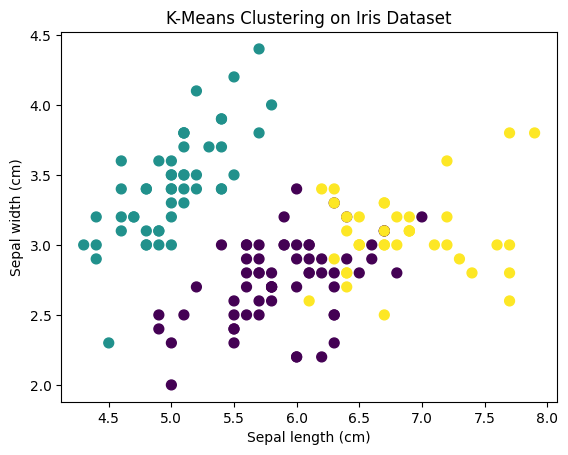

In [3]:
# Applying K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  # Taking 3 clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis',)  # Using the first two features for visualization
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster_Kmeans
1    62
2    50
3    38
Name: count, dtype: int64


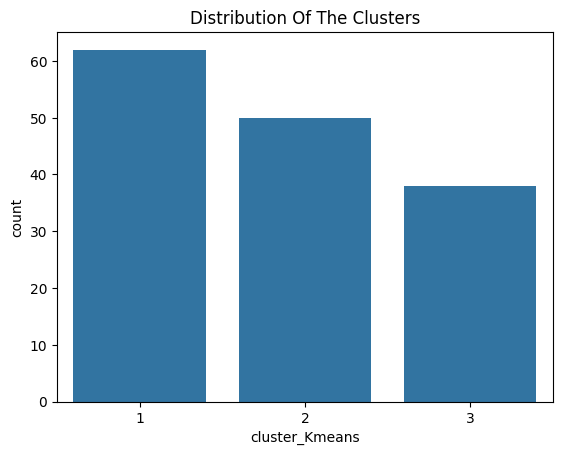

In [9]:
# This an additional step I've done to visualize the clusters value counts
X_0 = X.copy()
# Training a predicting using K-Means Algorithm.
kmeans=KMeans(n_clusters=3, random_state=42).fit(X_0)
pred=kmeans.predict(X_0)
# pred = kmeans.fit_predict(X_0)

# Convert the NumPy array to a Pandas DataFrame
X_0_df = pd.DataFrame(X_0)
X_0_df
# Appending those cluster value into main dataframe (without standard-scalar)
X_0_df['cluster_Kmeans'] = pred + 1  # Adding 1 to cluster labels for clarity (clusters start from 0)

# Displaying the cluster labels
print(X_0_df['cluster_Kmeans'].value_counts())

sns.countplot(x=X_0_df["cluster_Kmeans"])
plt.title("Distribution Of The Clusters")
plt.show()

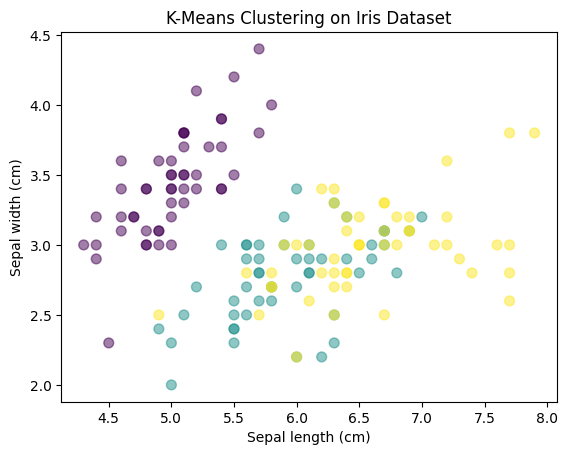

In [10]:
# Evaluate the clustering
# Plotting the actual species labels for comparison
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

#### **Choosing the Optimal Number of Clusters**

  **Task:** Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset. Visualize the Silhouette Score for different cluster counts.


**Key Concepts:**
 >  - **1. Elbow Method**
  The Elbow Method helps to identify the number of clusters by plotting the sum of squared distances from each point to its assigned cluster center (inertia) and finding the "elbow" point where the rate of decrease sharply slows.

 >   - **2. Silhouette Score**
  The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 (bad clustering) to 1 (good clustering). Higher values indicate better-defined clusters.

In [17]:
# Finding the optimum number of clusters for k-means classification

# Elbow Method
inertia = []
K_range = range(1, 11)  # Testing different numbers of clusters from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Calculating the Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_scores = []
# loop for different cluster counts
for k in range(2, 10):    # or range[1:] --> Start from 2 because silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

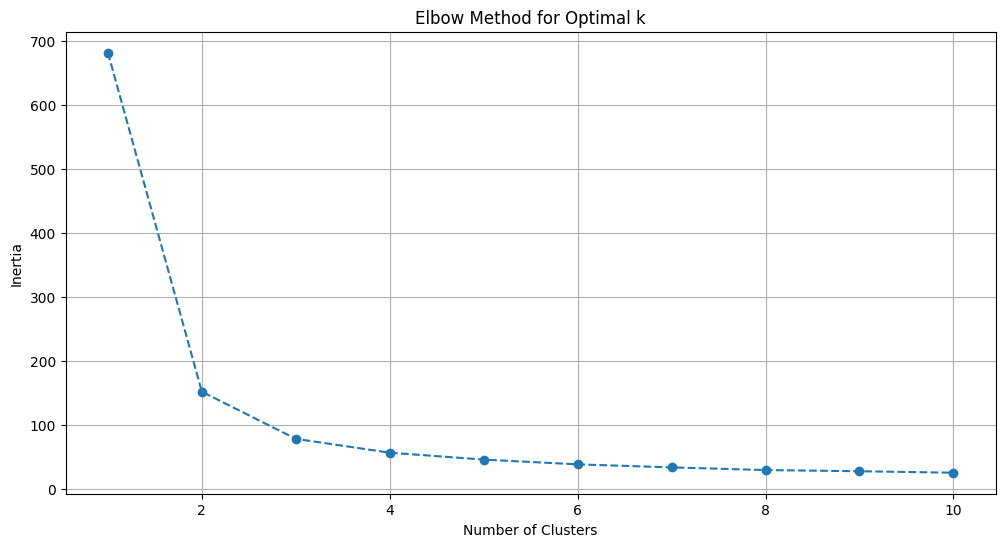

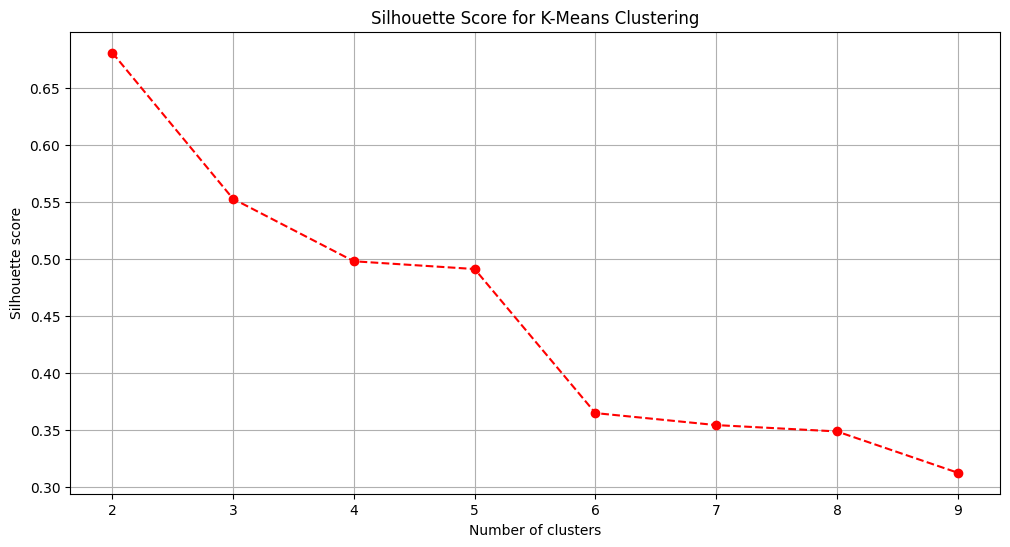

In [19]:
# Plotting Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Plotting the Silhouette Score
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

In [21]:
# Display the best k based on silhouette scores
best_k = K_range[1:][np.argmax(silhouette_scores)]
print(f"Best number of clusters based on Silhouette Score: {best_k}")

Best number of clusters based on Silhouette Score: 2


#### **Cluster Visualization with PCA**

  **Task:** Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions. Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         count          mean       std       min       25%       50%  \
col1     150.0 -2.936910e-15  2.056269 -3.223804 -2.530348  0.554619   
col2     150.0 -8.822572e-16  0.492616 -1.265971 -0.325415 -0.022157   
cluster  150.0  1.146667e+00  0.805907  0.000000  0.000000  1.000000   

              75%       max  
col1     1.550143  3.795645  
col2     0.324915  1.374165  
cluster  2.000000  2.000000  


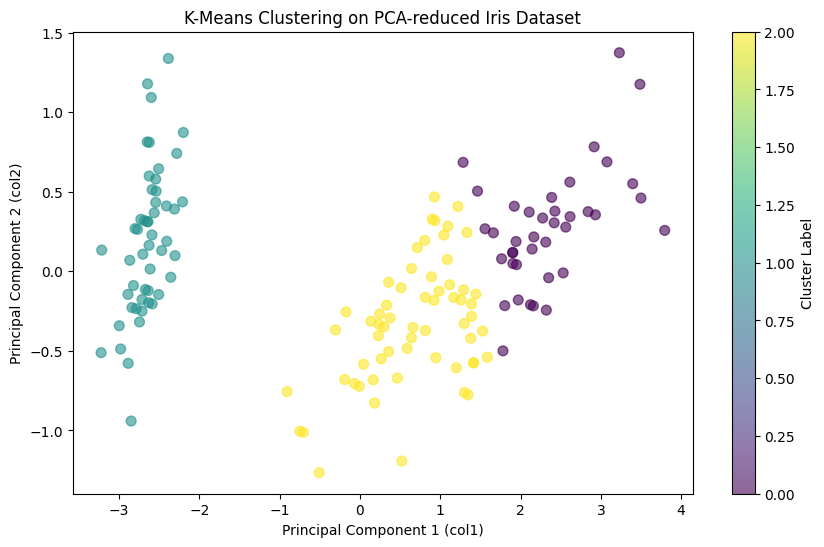

In [22]:
from sklearn.decomposition import PCA

# Initiating PCA to reduce Iris dataset dimentions aka features to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# pca.fit(X)
# X_pca = pca.transform(X)

# Creating DataFrame with PCA components
# PCA_ds = pd.DataFrame(pca.transform(X), columns=(["col1","col2"]))
PCA_ds = pd.DataFrame(X_pca, columns=["col1", "col2"])

# Applying K-Means clustering on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(PCA_ds)
y_kmeans_pca = kmeans_pca.predict(PCA_ds)
kmeans_pca.fit(X_pca)
y_kmeans_pca = kmeans_pca.predict(X_pca)
# y_kmeans_pca

# Adding K-Means cluster labels to the DataFrame
PCA_ds['cluster'] = y_kmeans_pca


# Display the PCA DataFrame summary
print(PCA_ds.describe().T)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, s=50, cmap='viridis')
plt.scatter(PCA_ds['col1'], PCA_ds['col2'], c=PCA_ds['cluster'], s=50, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering on PCA-reduced Iris Dataset')
plt.xlabel('Principal Component 1 (col1)')
plt.ylabel('Principal Component 2 (col2)')
plt.colorbar(label='Cluster Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

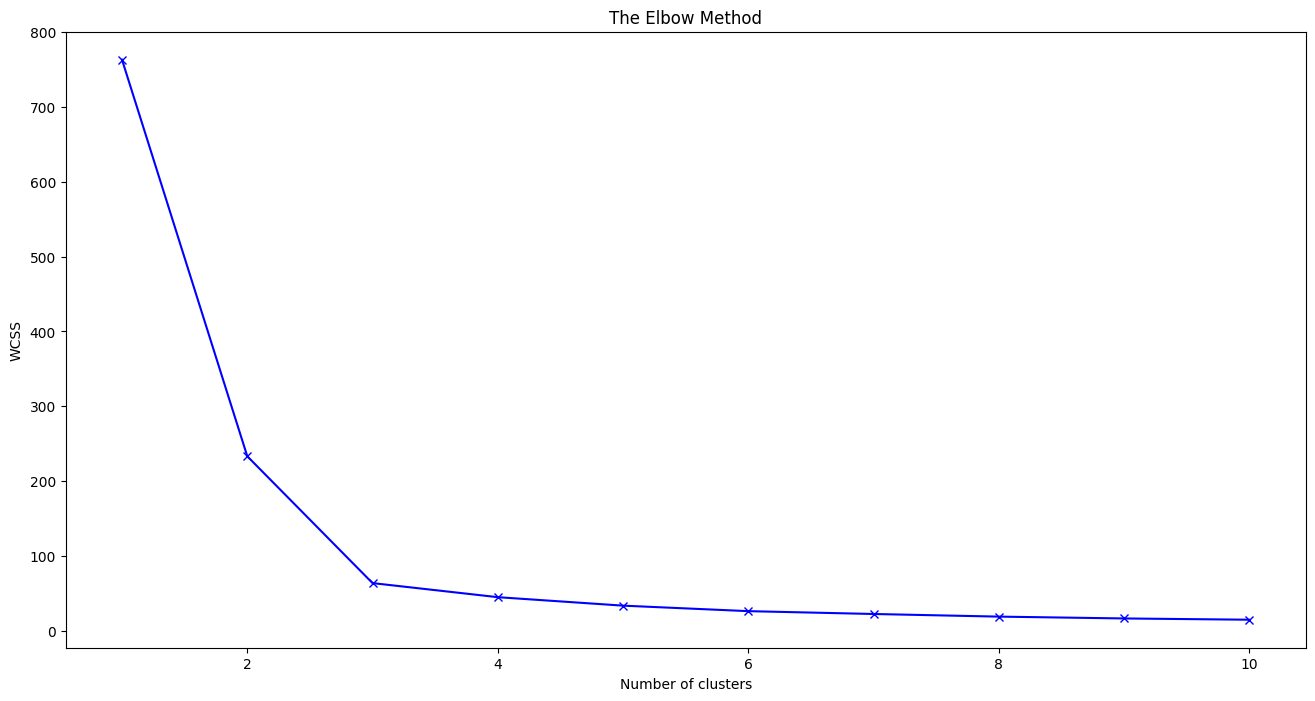

In [23]:
# Elbow method
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### **Hierarchical Clustering: Dendrogram**

  **Task:** Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.


In [ ]:
# Perform Agglomerative Hierarchical Clustering
# agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
# agg_labels = agg_clustering.fit_predict(X)

# # Compute the linkage matrix
# linked = linkage(X, method='ward')

# # Plot the dendrogram
# plt.figure(figsize=(12, 8))
# dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=iris.target)
# plt.title('Dendrogram for Hierarchical Clustering')
# plt.xlabel('Sample index')
# plt.ylabel('Distance')
# plt.show()

# # Plot the clusters
# plt.figure(figsize=(12, 8))
# plt.scatter(X[:, 0], X[:, 1], c=agg_labels, s=50, cmap='viridis')
# plt.title('Hierarchical Clustering Results')
# plt.xlabel(features[0])
# plt.ylabel(features[1])
# plt.colorbar(label='Cluster Label')
# plt.show()

# # Create a DataFrame to display the results
# cluster_df = pd.DataFrame(X, columns=features)
# cluster_df['Cluster'] = agg_labels
# print(cluster_df.head())

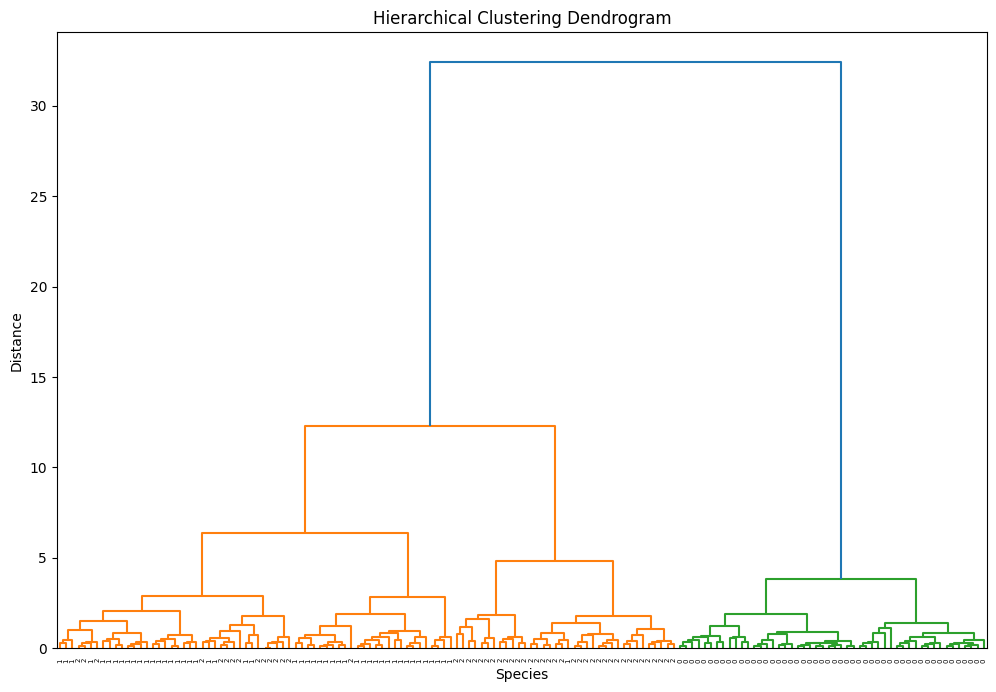

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Performing hierarchical clustering using complete linkage
# linkage function to compute the linkage matrix
Z = linkage(X, 'ward')  # 'ward' minimizes the variance of cluster

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=iris.target)
# dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=iris.target)  # labels = data['target'].values
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Species')  # Sample inde
plt.ylabel('Distance')
plt.show()

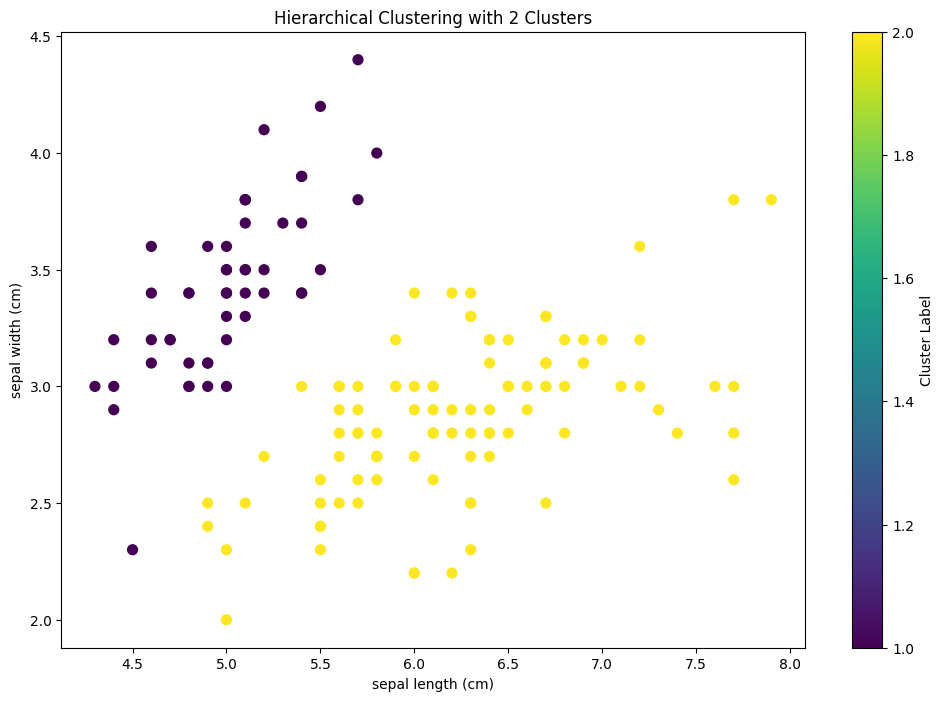

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [35]:
# Choose and validate an appropriate number of clusters
num_clusters = 2  # Choose an appropriate number of clusters based on the dendrogram
# Obtain cluster labels
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title(f'Hierarchical Clustering with {num_clusters} Clusters')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.colorbar(label='Cluster Label')
plt.show()

# Display the first few rows of cluster labels
cluster_df = pd.DataFrame(X, columns=features)
cluster_df['Cluster'] = clusters
display(cluster_df.head())

#### **Comparing Clustering Algorithms**

  **Task:** Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach based on the results.


*Strengths and weaknesses can be discussed based on the clustering results obtained from each method, including factors like computational complexity, sensitivity to cluster shape and density, and interpretability of results.*


**K-Means Clustering:**
- Strengths: Simple and fast, scales well to large datasets.
- Weaknesses: Assumes clusters are spherical and of equal size, sensitive to initial centroids.

**Agglomerative Hierarchical Clustering:**
- Strengths: Does not assume clusters to be spherical, can capture complex cluster shapes.
- Weaknesses: Computationally more expensive, less scalable to large datasets.

In the context of the Iris dataset, K-Means might perform well due to its simplicity and the relatively clear separation of clusters, whereas hierarchical clustering might provide more insights into the hierarchical structure of the data but at a higher computational cost.




---


---

